In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import json
from match_temp import *

In [47]:
with open("img_log4.txt", "r") as f:
    js = json.loads(f.read().replace("'", '"'))['test_case']

In [48]:
combined_image = np.array(js[0], dtype = np.uint8)
patch_image = np.array(js[1], dtype = np.uint8)

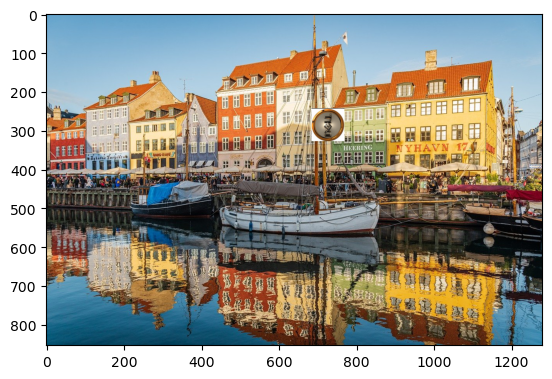

In [49]:
plt.imshow(combined_image);

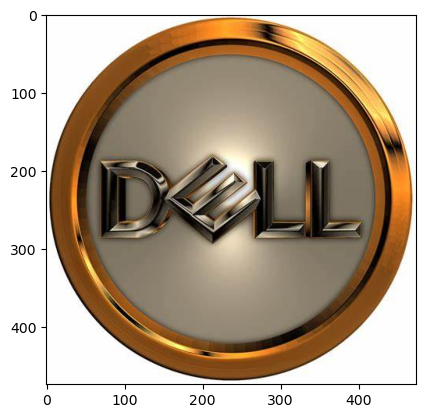

In [50]:
plt.imshow(patch_image);

In [60]:
import time
start = time.time()
res = find_and_fill(combined_image, patch_image, threshold=0.4, auto_scale=(0.05, 0.5, 0.01), fill_size=10)
print(time.time() - start)


1.5166044235229492


In [64]:
res.shape == combined_image.shape

True

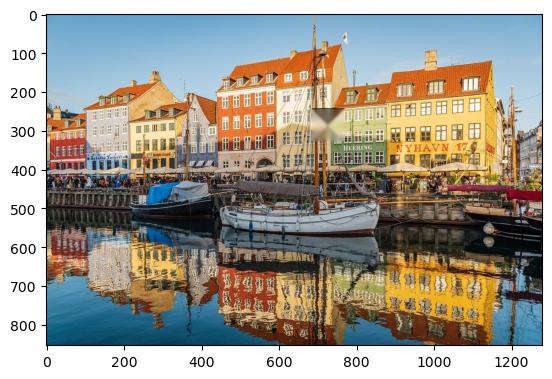

In [61]:
plt.imshow(res);

In [57]:
results = find_tepmlates(combined_image, patch_image, threshold=0.5, auto_scale=(0.05, 0.5, 0.02))

In [8]:
cf, rect = sorted(results)[-1]

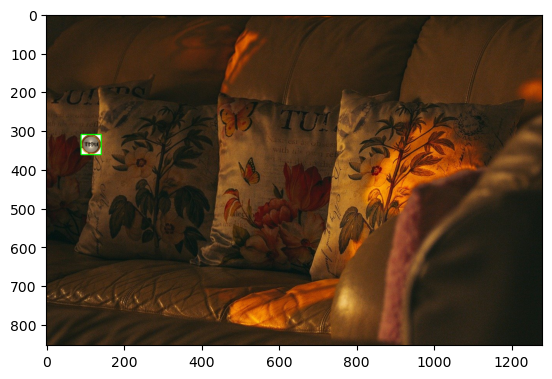

In [9]:
img = combined_image.copy()
cv.rectangle(img, (rect[0][0], rect[0][1]), (rect[3][0], rect[3][1]), (0, 255, 0), 2)
plt.imshow(img);

In [10]:
mask = np.zeros(combined_image.shape[:2], dtype=np.uint8)
mask[rect[0][1]:rect[3][1], rect[0][0]:rect[3][0]] = 255

In [11]:
dst = cv.inpaint(combined_image, mask, 5, cv.INPAINT_TELEA)

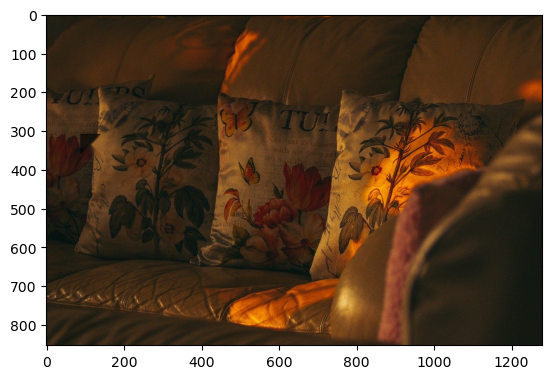

In [12]:
plt.imshow(dst);

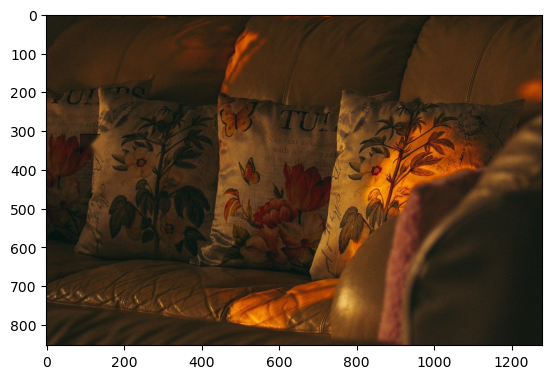

In [13]:
plt.imshow(content_aware_fill(combined_image, rect, 10));

In [12]:
import time
start = time.time()
res = find_and_fill(combined_image, patch_image, threshold=0.5, auto_scale=(0.05, 0.5, 0.01), fill_size=10)
print(time.time() - start)

1.5334436893463135


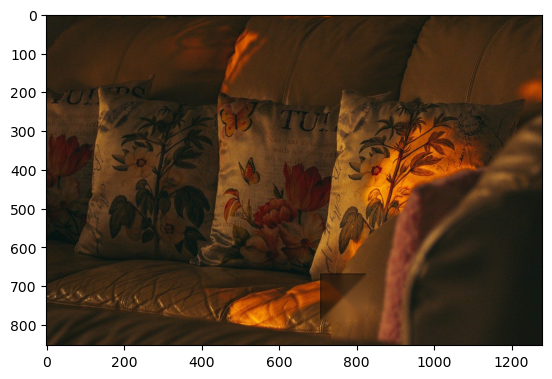

In [13]:
plt.imshow(res);